# 0. Gradient Descent
    - 너무 간단한 알고리즘
        - 너무 간단해서 좋은 것들을 합친 기법을 사용한다.
        - 대안: Momentum, RMSprop, Ada Gradient ... 
        - Momentum :  그 전에 몇 개 지점을 가지고 업데이트를 함 ... 효율적으로 local을 빠져 나감
        - RMSprop : ?
    - 요즘의 대안 : __Adam Optimization__

# 1. Logistic Regression
### 1-1-1. (review) 1st class : 머신러닝의 원리
    - y = wx+b ... __어떻게 업데이트를 시킬 것인가?__
        - loss
            - (y - y_hat)^2
            - y : 실제 output, y_hat : 예측 output
        - cost
            - 모든 data의 loss를 계산하고 난 다음의 평균(혹은 평균/2)
    - __cost가 줄어드는 방향으로 parameter를 미세하게 update함__ (미분방식)
    - (cost가 줄어드는 방향으로 parameter를 미세하게 update하다보면)w와 b가 종국에는 실제 output이 비슷해지는 방향으로 update가 될 것
    - __ML Training__
    
### 1-1-2. ML 기본 요약
    - y = wx + b
    - loss : (y - y_hat)^2
    - cost : (mean(all_loss)) / 2
    - Cost가 줄어드는 방향으로 Parameter를 미세하게 Update(미분방식)
    - 종국에는 w와 b가 실제 output과 비슷해지는 방향으로 Update 됨


### 1-2. (review) 2nd & 3rd class : 수치를 예측하는 문제(회귀 문제)
#### 1-2-1. 수치를 예측하는 Regression
    - 회귀모형의 유례
        - 200~300년 전, "아빠와 아들의 키를 Regress 한다."고 주장을 한 사람을 기려서 이름을 붙였다. 실제로는 다르다?

#### 1-2-2. 분류 문제를 다루는 Classification
    - 신용정보를 넣었는데 대출을 갚을지 안 갚을지 예측하는 모형

#### 1-2-3. label에 따른 문제 유형
    - input data가 들어 왔는데 label(output)이 붙어있다.
    - 그 label에 숫자가 적혀 있으면 회귀 문제, categorical 변수가 있으면 분류 문제
        - 정성(정량)적인 걸 예측하고 싶으면 분류 문제

#### 1-2-4. 분류 모델을 알면 좋은 것
    - ex) Trivago 
        - 호텔 예약해주는 사이트에서 log data를 모은다.
        - '이런 행태를 보이는 사용자는 호텔을 실제로 예약을 한다' 와 '이런 행태를 보이는 사용자는 호텔을 예약하지 않는다'
        - 모델에 때려 넣어서 뭐가 완성이 되는 거냐.
            - 사용자의 행태가 들어가면 예측 여부가 들어가는 모델이 만들어짐.
        - 실제로 호텔을 예약 할지 안 할지를 예측하는 건 별로 쓸모가 없다.
        - 그런 것보다 이 사람의 행태를 결정하는 몇 개의 변수가 있는데 어떤 변수가 호텔을 예약하고, 예약하지 않는지 가장 영향을 많이 미치는가를 조사한다.
        - Facebook에서 들어온 사람도 있고, Twitter에서 들어온 사람도 있다면...
        - Facebook에서 들어온 사람이 예약을 훨씬 더 많이 한다면, 트위터에 들어간 광고비를 빼서 페이스북에 넣는다.
        - (마케팅 기법에 적용하는데)그걸 그로스 해킹이라고 부른다.
    - 분류 모델은 쓸 수 있는 가능성이 무궁무진하다.

#### 1-2-5-1. 회귀와 분류의 차이점
    - (회귀문제) 사고의 흐름 : 모델을 만들고, loss를 계산하고, cost를 구해서 parameter를 업데이트 한다.
        - 분류 모형의 경우에도 마찬가지다. 똑같이 작동한다. 근데 쓰이는 machine이나 loss의 종류가 달라진다.
    - (분류문제) 사고의 흐름 : (사고의 흐름은 비슷하나) 쓰이는 Machine과 loss의 종류가 조금씩 달라진다.

    - ex) 집 값이 10억 이상일지, 이하일지 예측하는 모델
        - x : area(평수), y: high/low
        - input(평수)가 들어갔는데 집값이 높을 것인지에 대한 확률을 뱉어준다.
            - input이 들어갔는데 Output이 얼마일지에 대한 확률 ... 이건 회귀/분류 모델 둘 다?
        - (classification) 모델 만드는 박스에 필터 하나가 추가된다.
        - 모델은 확률을 예측한다.
        - P(Y = 고(x)) ?

    - 분류문제(Classification)의 확률
        - 0 <= Y <= 1
            - 예측한 확률의 값이 0~1 사이에 나오게끔 필터를 걸어줘야 한다.
    - 회귀문제(Regression)의 확률
        - -∞ <= x - w + b <= +∞
            - 어떠한 값도 가질 수 있다.

#### 1-2-5-2. 회귀와 분류 요약
    - 회귀와 분류문제는 사고의 흐름은 비슷하나, 쓰이는 Machine과 loss의 종류가 조금씩 다르다.
    - 확률을 예측해주는 모델 (회귀, 분류 둘 다?)
        - 회귀문제의 w와 e : -∞ ~ +∞
            - 모든 실수를 취함(어떤 수치도 가질 수  있음)
        - 분류문제의 w와 e : 0 ~ 1
            - filter를 걸어서 나타내줘야 함.

#### 1-2-6-1. 회귀/분류 모델의 loss
    - (어떻게 확률을 가질 것인지에 대한 논의는 나중에하고) 확률을 예측하는 모델을 만들었다면 loss는 어떻게 계산할 것인가?
    - 모델에 평수를 넣어줬는데 집값이 높은 카테고리에 속할 확률이 0.8이라고 모델이 알려줬다.
        - 실제로는 집값이 낮은 카테고리에 속했다면 ... 잘못하고 있다는 것.
    - loss는 모델이 얼마나 잘못 예측하고 있는지를 정량화해서 나타내주는 지표
    - 회귀문제였다면...
        - (예측값이 120, 실제값이 100인 경우)
        - (y - y_hat)^2
            - loss = (100 - 120)^2
    - 모델이 얼마나 잘못하고 있는지를 정량적으로 어떻게 나타낼 것인가?
        - (loss를 정량적으로 계산하는 법을 알았다면...)
        - 모든 데이터에 대해서 다 loss를 구해서, cost를 만들어서 parameter를 update하면 된다.

#### 1-2-6-2. 분류 문제를 할 때 알아야 할 두 가지
    - 1) 분류 문제를 할 때, 모델 자체가 어떻게 바뀌는가?
    - 2) 그 모델이 확률 값을 내뱉어줬는데, 그 확률 값에 대한 loss를 어떤 식으로 정의할 것인가?
    
#### 1-2-6-3. Train / Validation / Test (2번째 시간을 떠올리면서)
    - 회귀(Regression)모델
        - Training Set으로 Model을 Training시키고, Validation Set으로 Model을 선택하고, 마지막으로 Test Set으로 모델을 평가하는 과정
        - Validation Set에 대한 성능
            - Validation Error : Training Error 계산하듯이
                - (y - y_hat) ^2
                
    - 분류(Classification) 모델
        - 모델이 얼마나 잘 하고 있는지 알려주는 지표 : 정밀도(정확도, 재현율, 스코어)
            - 모델이 예측했는데, Validation Set에 있는 집 값으로 미루어 봤을 때, 이 집이 높은 카테고리에 속할 확률이 0.8이라고 함
                - 근데 실제로 높았으면, 얼마나 잘하고 있는지 측정하는 지표가 필요하다.
                - 근데 Regression에서 loss를 정의하는 방식과는 다르다.
            - (모델이 예측했다면, 높은 카테고리 확률이 0.8이라고 했는데 맞췄다면) 어떤 지표를 가지고 CV를 할 것이냐?
            
#### 1-2-6-4. off-the-shelf Model  (3번째 시간을 떠올리면서)
    - Descision Tree / Random Forest / Descision Tree Model
        - Tree Based Model은 회귀 문제와 분류모델을 푸는데 간단하게 쓸 수 있다.
            - 장점 1 : 성능이 좋다.
            - 장점 2 : 어떤 문제에도 쉽게 적용이 가능하다.
            - loss를 정했으면, 그 loss를 최소화하는 방향으로 Descision Tree를 내릴 수 있다.
                - (회귀문제) cost값을 최소화하는데 Grdient Descent가 아니라 다른 알고리즘을 썼다.

        - Hotel log data analysis할 때, Random Forest와 Boosting Model을 섞어서 쓴다.
            - Neural Network는 성능이 좋지 않다.
            
### 1-3. Affine Transformation & Activation Function
    - 확률을 예측해주는 (Training Set으로 훈련시킨)모형이 있다고 상정하고, 그 모델의 Validation Error를 어떻게 측정할 것인가?(23:10)
        - 1) Affine Transformation
            - x(input)에다가 숫자를 곱해서(w) 상수를 더하는(b) 과정을 변환시키는 것을 칭하는 말.
            - wx + b
            
        - 2) Activaion Function
            - w를 곱하고 b를 더하는 것까지 하는 건, 모든 실수(-∞ ~ +∞)다.
            - 그러니까 우리는 확률 값을 예측하는 모형을 만들고 싶으니까
            - 범위를 0~1까지로 좁혀주는 filter가 필요하다.
            - Affine Transformation을 하고, 거기에 Activation Function을 적용하는 과정을 반복적으로 하는 Model이 Deep Learning
            - y = wx + b + filter를 적용하는 걸 Activation Function
            - 이렇게 훈련시킨 모델은 확률 값을 뱉어야 한다.

### 1-4. 분류모델의 Validation(성능측정) : F-score
<img src = "https://photos-5.dropbox.com/t/2/AAD__vGT4WB0PMk6pMVjz2bpYHM7xtwP1Bw-oU-gZhuVjg/12/848258672/jpeg/32x32/3/1528473600/0/2/IMG_1079.JPG/EPDS_JsJGG0gAigC/MIUYoIty4aZU3h_GtNI8mN0ILf_69iDy7zhmTOaNRig?dl=0&size=2048x1536&size_mode=3">
- [table](https://docs.google.com/spreadsheets/d/1-CrDhoAi7v2nsrFc4L4vwrl-ePEjamE5dcYdFObnv00/edit#gid=0)

    - ex) 파산여부를 예측하는 모델
        - y : 그 사람이 파산할 확률
        - 예측 기준
            - y_hat > 0.5 = 파산 o
            - y_hat < 0.5 = 파산 X
        - 가정 : "개인정보를 넣었는데 파산한 확률이 0.8이라면, 파산한다고 친다."

        - 모델 성능 측정 기준
            - 모델의 성능을 판단하려면, Validation Error같은 것이 필요하다.
            - Training Set으로 훈련시킨 모델이 Validation Set에 의해서 얼마나 잘하고 있는지 지표를 알아야 한다.
            - 그 지표를 표에서 끄집어 내야 하는데, 얼마나 잘하고 있는지 숫자 하나가 필요하다.
            - 어떻게 하나로 취합할 수 있을까?

<img src = "https://photos-1.dropbox.com/t/2/AACMX2QDbQWSg8fc5hej8yMfacf43B178EDpLlAzs0KA4g/12/848258672/png/32x32/3/1528484400/0/2/Screenshot%202018-06-08%2023.57.24.png/EPDS_JsJGHEgAigC/K7a9HlG4FhUj3qXlFyXbg9hhgnQ5WwxHrWsIpWqxjT4?dl=0&preserve_transparency=1&size=2048x1536&size_mode=3">

#### 1-4-1. Accuracy
    - 예측값과 실제값으로 표를 만든다.
    - 4가지 경우의 수가 생김
        - TP : Positive - True Positive
        - FP : Positive - False Positive (Type1 Error)
        - TN : Negative - True Negative 
        - FN : Negative - False Negative (Type2 Error)

    - Accuracy란, 4개를 다 더해서 잘한 것을 나눠서 비율로 보겠다는 것이다.
        - (1000+120) / (1000+120+200+500)
        
    - 허나, 일반적으로 Accuracy는 좋은 방법이 아니다.
        - ex) 암 환자 예측
        - 암 검사를 받으러 들어왔는데, 들어오는 사람들을 다 암이 아니라고 예측했다.
        - 의사가 양성이라고 예측한 사람은 0명이다. 실제로 1000명이 들어왔는데 2명이 암이었다면...
        
<img src="https://photos-2.dropbox.com/t/2/AADUjWOVYgMwPoExVqimVR4r3G_JXbOMU1fTWDwyUrCMJg/12/848258672/png/32x32/3/1528488000/0/2/Screenshot%202018-06-09%2000.06.01.png/EPDS_JsJGHIgAigC/a5lLay_dRCrwYgf3PKdYcIGghunsTzs3v4jSPHbscFo?dl=0&preserve_transparency=1&size=2048x1536&size_mode=3">

    - 정확도를 성능 평가의 지표로 삼기에는 문제가 있다.
        - Accracy 공식에 따르면 정확도가 99.8%(998 / 1000)가 된다.
        - 정확도가 99.8%라서 훌륭한 의사라고 얘기할 수는 없다.
        
    - Positive와 Negative의 비율이 1:1 정도로 균일하다면 Accuracy를 쓸 수 있다.
        - 허나 균등하지 않은 경우가 대부분이다.
        - 파산하는 사람보다 파산하지 않는 사람이 더 많으니까 Accuracy를 그대로 쓰기에는 무리가 있다.
        
    - 다른 지표가 필요하다.
    
#### 1-4-2. Precision & Recall
    - 1) Precision (정밀도)
        - TP / TP + FP
            - 120 / 320		
    - 2) Recall (재현율)
        - TP / TP + FN
            - 120 / (120+500)

    - Precision과 Recall 중 어떤 게 중요한지는 다루는 데이터에 따라 다르다.
    
        - ex 1) 파산 예측 모형				
            - 파산할 지, 파산하지 않을지에 대한 모형을 만든다면 Precision이 높은 게 좋을까? Recall이 높은 게 좋을까?				
            - Type1 Error를 줄이는 게 중요할지, Type2 Error를 줄이는 게 중요할까?				

            - 이 모형에서는 Precision은 중요하지 않다.
                - 돈을 빌려줘야하는데 파산할 거라고 예측해서 돈을 빌려주지 않았는데,
                - 파산하든지 안 하든지 돈을 빌려준 게 없으니까 손해를 보는 게 아니다.
                
            - 이 모형에서는 Recall이 중요하다.
                - 근데 파산하지 않을 거라고 예측해서 돈을 빌려줬는데 500명이 파산을 해버린 것은 최악이다(False Negative가 높은 경우).
            - 그러니까 이 모델은 좋은 모델이 아니다.

        - ex 2) 법관의 죄 판결
            - 무죄 추정의 원칙
                - 무죄라고 예측했는데 실제로 유죄였던 사람은 상관 없지만, 유죄라고 예측했는데 실제로 무죄인 사람이 있어서는 안 된다.
            - 이 경우에는 Precision을 높이는 게 중요하다.

#### 1-4-3. F-Beta-Score & F-Score
    - Table을 계산했으면, Validation Set을 예측 결과를 정량화 하기 위한 하나의 숫자가 필요하다.
        - 정밀도와 재현율이라는 두 개의 숫자를 어떻게 취합할 것인가?
        - 그걸 나타내주는 지표가 F-Beta Score(조화평균)다.
    - Precision과 Recall을 조화평균낸 것
        - P와 R에 얼마만큼의 가중치를 둬서 조화평균을 취할지를 나타내는 숫자가 Beta
        - 가중치를 0~1에서 정해야 한다.

    - 보통 F-Beta가 아니라 F-1 Score를 많이 쓴다.
        - (2 * P * R) / P * R
        - Precision과 Recall 의 가중치를 1:1로 둬서 조화평균을 취하자는 것
        - 역술평균한 게 조화평균인데, 조화평균분의 1은...
    - Precision과 Recall이라는 걸 계산해서 F-Score를 만들자.
    - 그리고 이렇게 만든 F-Score를 이 모형이 얼마나 잘하고 있는지의 지표로 사용하자!
    

#### 1-4-4. 정리
<img src="https://photos-6.dropbox.com/t/2/AAD1JhWKjdRKdF8Dieal4vSnPOupgtY21ik9a4jFDJ--cQ/12/848258672/jpeg/32x32/3/1528488000/0/2/IMG_9535.JPG/EPDS_JsJGHMgAigC/vsKihWb69ih__iyJxCz684fG-aoU8wQZ-hIrc-_7aHo?dl=0&size=2048x1536&size_mode=3">
    - 첫 번째 모델은 Random Forest Model, 두 번째 모델은 Logistic Regression Model을 사용했다.(42:30)
    - Model이 예측한 결과로 Table을 만들었다.
    - Model F-Score		
        - Model 1 : 0.9		
        - Model 2 : 0.8		
    - F-Score가 높은 Model 1을 선택함.		
    - 이게 Validation을 통해서 분류모델을 선택하는 방법이다.		
	- 그전에는 모델에다 넣어서 표를 만드는 게 아니라 그냥 (all(y - y_hat)^2)/n
    - 지금은 그렇게 하는 게 아니라 표로 만들어서 F-Score라는 지표를 뽑아냈다.
    - 그렇게 뽑아낸 F-Score라는 지표를 그 모델이 얼마나 잘하고 있는지를 나타내는 지표로 사용하자!

- - -
> - k-fold cross validation
>> - 회귀 모델과 분류모델은 크게 다르지 않다. (45:20)
>> - 사진 찍음

- 확률을 예측하는 모형을 만들었는데... Cut-off value를 논의해야한다. (48:40)
- Sigmoid
> - , DL에서도 알아야 하는 개념
>> - 맨 마지막 layer에 들어감.
>> - simoid는 함수다.
>>> - sigmoid(x) =  e의 x승 / (1+ e의 X승)
>> - 지수 함수에 0이 들어가면 1이다.
>>> - y = 2x (2에 x승)
>> - sigmoid(0) = 1/2 ... 1 / (1+1)
>> - sigmoid(1억) = 1
>> - sigmoid(-1억) = 0

- sigmoid를 filter로 쓸 것이다.
> - filitering을 씌우는 근간이 deeplearning

- logistic regression 모형
> - y_hat = sigmoid(wx+b)
> - y_hat = 소문자 sigma(wx+b)

- 예측한 값이랑 실제 label이 얼마나 잘못 예측하는지 정량적으로 측정 (54:30)
> - training 이랑 validation이랑 다르다.
> - 얼마나 정량적으로 다른지
- 우리는 이진 분류(Binary Classification)에 대해서 하고 있다.
> - '예 / 아니오' 두 가지로 나눔
> - 그게 아니라면 다중 분류(Multiclass Classfication)가 있다.
>> - 개, 고양이, 새 ... 등등
> - 그렇기 때문에 확률 값이 하나만 필요하다.
>> - 파산을 할지 안 할지 확률 ... 이진분류로 구하는 것(뺴면 되니까)

- 미분방정식 풀기(57:30)
> - y' = y(1-y)

- 질문 (57:30 ~ 59:00)
> - roc curve

#### 머신러닝을 잘하기 위해 필요한 수학 : 미분 / 행렬
- [의사 통계맹](https://www.slideshare.net/cyberdoc73/20130320-lems-colloquium)


# 2. one-hot-encoding
- 하나만 핫하게 만드는 인코딩
> - y(label) = {고양이, 강아지, 햄스터}
> - output은 하나고, 종류는 세 개
> - 다중공선성 문제
>> - 마지막 가변수를 빼준다.

- y = {O, X} 
- logloss(1시간 8분)
- 최대우도추정법

# 3. 실습
- (1시간 24분)
- 회귀모형
- 분류모형

In [1]:
Machine <- function(x, w, b){
    
    y_pred <- x * w + b
    
    return(y_pred)
    
}

In [2]:
Machine(2, 1, 3)

[1] 5

- x가 하나의 숫자가 아니어도 3개의 숫자여도 잘 작동한다
- x가 1, 2, 3으로 구성된 것이라면...
> - c(1,2,3), 2, 1) ... (2, 4, 6) + 1 ... (3, 5, 7)

In [3]:
Machine(c(1,2,3), 2, 1)

[1] 3 5 7

In [4]:
Cost <- function(x, y, w, b){
    y_pred <- Machine(x, w, b)

    loss <- (y - y_pred)^2
    
    cost <- mean(loss)
    
    return(cost)
}

###  1시간 31분
- y = x^2 함수 (x제곱)
- x가 얼마나 많이 바뀌느냐

- 미분은 접선의 기울기를 구한다는 것이다...

In [5]:
1.01^2

[1] 1.0201

In [6]:
(1.01^2 - 1^2)/(0.01)

[1] 2.01

In [11]:
Class <- function(x){
    y <- x^2 + 2^x + sin(x)
    
    return(y)
}

In [12]:
Class(1)

[1] 3.841471

In [13]:
(Class(1 + 0.01) - Class(1)) / (0.01)

[1] 3.937196

- 1시간 40분
- 우리가 가지고 있는 w를 0.001만큼 증가시키겠다는 것
- w를 그대로 뒀을 때의 cost 값을 빼야지
- 도함수 / (0.001)
> - 비율을 측정시키기 위해서
- w를 조금만 키울 경우, 0.001늘어났을 때 양수라는 소리는 

- 비율 = (바꾼 값 - 원래 값) / (늘린 값)
- 그렇게 업데이트 시킨 w, b를 뱉자

In [14]:
Trainer <- function(x, y, w, b, step){
    dw <- (Cost(x, y, w + 0.001, b) - Cost(x, y, w, b)) / (0.001)
    db <- (Cost(x, y, w, b + 0.001) - Cost(x, y, w, b)) / (0.001)
    
    w <- w - step * dw
    b <- b - step * db
    
    return(c(w, b))
    
}

In [15]:
x <- rnorm(20)
y <- 2 * x + 1 + rnorm(20) * 0.01

In [16]:
x
y

[1]  2.59287699  0.04616598  0.56528679 -0.23931739  1.30930083 -0.10199436
 [7] -1.36095308 -1.50834732 -0.11475586 -2.04169543 -0.24393621  0.06463862
[13]  0.23803496  0.54644236  0.81868258  2.29222877 -0.50046668 -2.31348125
[19] -0.63540627  0.37974054

[1]  6.1780416038  1.0975839434  2.1352950132  0.5288224536  3.6270399258
 [6]  0.7965771278 -1.7138932969 -2.0214991076  0.7625074970 -3.0818007027
[11]  0.5149416749  1.1204858381  1.4773107082  2.0873523899  2.6405161069
[16]  5.5701327164 -0.0009377594 -3.6360609064 -0.2812677593  1.7507093799

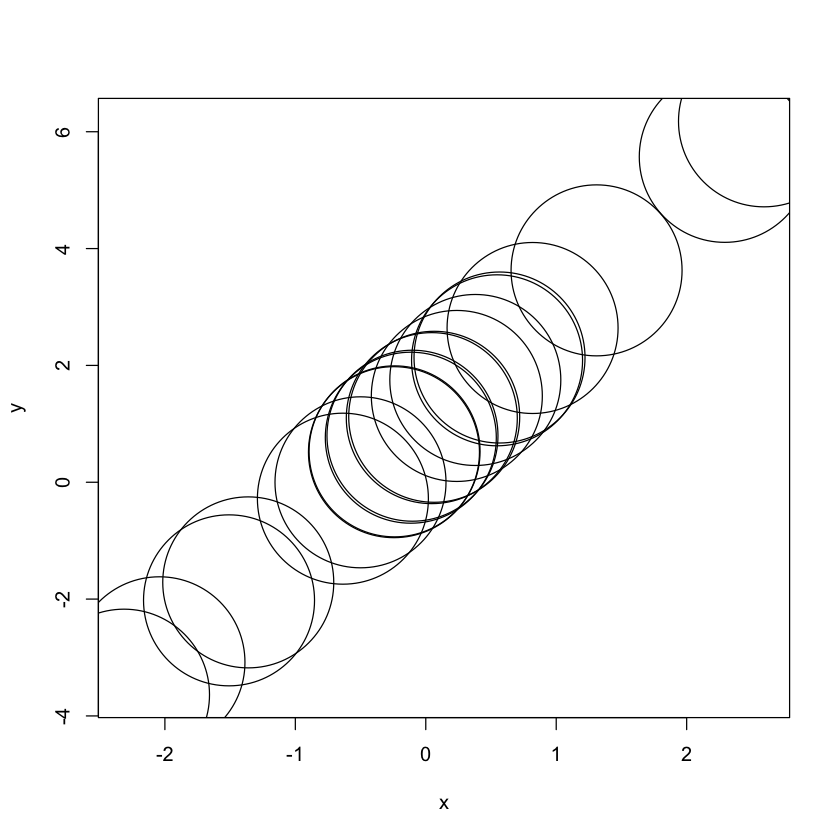

In [18]:
plot(x, y, cex=19)

In [20]:
# 1시간 44분
w <- 1
b <- 0

Trainer(x, y, w, b, 0.01)

[1] 1.02938422 0.01974881

In [21]:
Trainer(x, y, 1.02938421870597, 0.0197488122865463, 0.01)

[1] 1.05790188 0.03910873

In [36]:
# 1시간 47분

x <- rnorm(20)
y <- 2 * x + 1 + rnorm(20) * 0.01

w <- 1
b <- 0

passes <- 0

repeat{
    passes <- passes + 1
    
    temp <- Trainer(x, y, w, b, 0.01)
    w <- temp[1]
    b <- temp[2]
    
    if(passes == 1000){break;}
}

print(w)
print(b)

[1] 2.001475
[1] 0.9991729


#### 2시간 50초

for 문 (1시간 57분)

In [37]:
for(i in c(1, 2, 3, 4)){
    
    print(i)

}

[1] 1
[1] 2
[1] 3
[1] 4


In [40]:
sum <- 0

for(i in 1:100){
    
    sum <- sum + i

}
print(sum)

[1] 5050


In [42]:
w <- 1
b <- 0

for ( i in 1: 10){
    temp <- Trainer(x, y, w, b, 0.01)
    w <- temp[1]
    b <- temp[2]
}
print(w)
print(b)

[1] 1.234581
[1] 0.2631951


In [43]:
for ( i in 1: 10){
    temp <- Trainer(x, y, w, b, 0.01)
    w <- temp[1]
    b <- temp[2]
}
print(w)
print(b)

[1] 1.411763
[1] 0.4595182


In [44]:
for ( i in 1: 10){
    temp <- Trainer(x, y, w, b, 0.01)
    w <- temp[1]
    b <- temp[2]
}
print(w)
print(b)

[1] 1.545799
[1] 0.6057746


## 1시간 49분
- 분류모델
> - Machine에 filter를 씌운다

In [24]:
# 1시간 50분
sigmoid <- function(x){
    
    y <- exp(x) / (1 + exp(x))
    
    return(y)
}

In [26]:
sigmoid(0)

[1] 0.5

In [27]:
sigmoid(10)

[1] 0.9999546

In [28]:
sigmoid(-10)

[1] 4.539787e-05

In [29]:
sigmoid(c(-1, 1))

[1] 0.2689414 0.7310586

In [ ]:
# 1시간 50분
sigmoid <- function(x){
    
    y <- exp(x) / (1 + exp(x))
    
    return(y)
}

Machine <- function(x, w, b){
    
    y_pred <- sigmoid(x * w + b) ###
    
    return(y_pred)
    
}

## 1시간 54분!
# y는 0과 1로 구성이 되어 있어야 한다.
Cost <- function(x, y, w, b){
    y_pred <- Machine(x, w, b)

    loss <- -( y * log(y_pred) + (1 - y) * log(1 - y_pred) ) ###
    
    cost <- mean(loss)
    
    return(cost)
}


Trainer <- function(x, y, w, b, step){
    dw <- (Cost(x, y, w + 0.001, b) - Cost(x, y, w, b)) / (0.001)
    db <- (Cost(x, y, w, b + 0.001) - Cost(x, y, w, b)) / (0.001)
    
    w <- w - step * dw
    b <- b - step * db
    
    return(c(w, b))
    
}

### 2시간 2분 50초

In [30]:
install.packages("ISLR")


The downloaded binary packages are in
	/var/folders/9h/vzls18sn1pvgfwfymvybqkvw0000gn/T//Rtmp1jZYxR/downloaded_packages


In [31]:
library(ISLR)

In [32]:
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [45]:
table(Default$default)


  No  Yes 
9667  333 

- 333명이 Yes, 9667명이 
- 분석에 들어가기 전에 데이터의 구조부터 확인!

- balance = 신용카드 빠져나가고 남은 평균 잔고(한도) ... 계좌에 유지해야할 최소한의 잔고
- 계좌에 유지해야할 최소한의 잔고가 적을수록 파산의
- 아래의 그림을 보고
- balance가 높아지면 파산하는 사람이 많고, 낮아지면 파산하는 사람이 적어진다는 걸 볼 수 있다.

- default : 채무 불이행

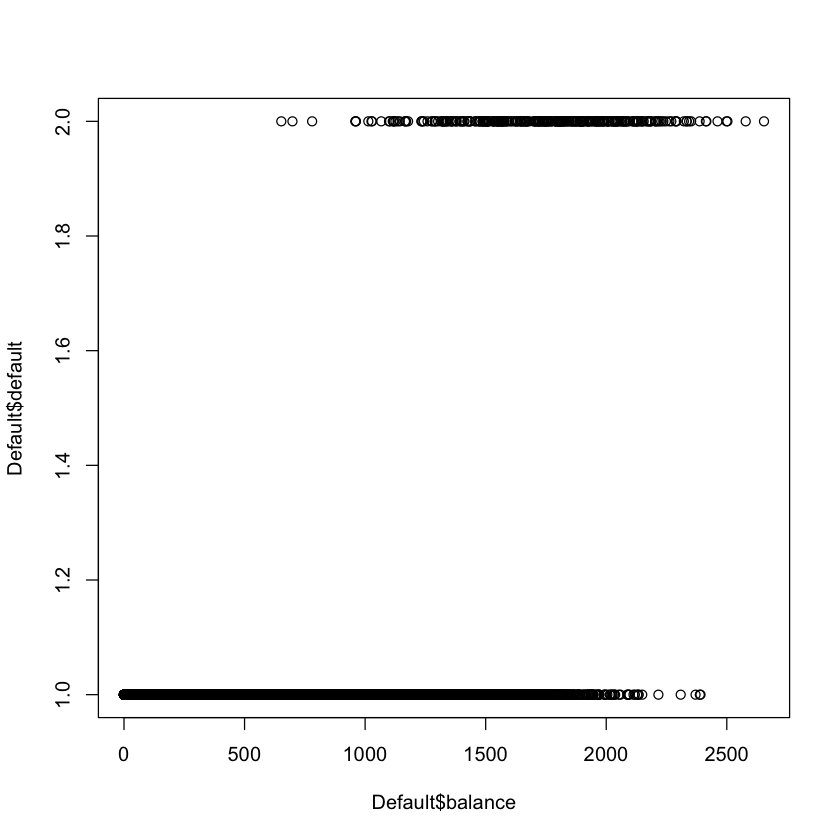

In [51]:
plot(Default$balance, Default$default, cex=1)

In [63]:
head(Default$default, 300)

[1] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [19] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [37] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [55] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [73] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [91] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[109] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[127] No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No 
[145] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[163] No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
[181] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[199] No  No  No  Yes No  No  No  No  Yes No  No  Yes No  No  No  No  No  No 
[217] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[235] No  No  No  No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No 
[253] No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
[271] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[289] No  No  No  No  No  No  No  No  No  No  No  No 
Levels: No Yes

In [66]:
table(Default$default)


  No  Yes 
9667  333 

In [64]:
ifelse(TRUE, 1, 0)
ifelse(FALSE, 1, 0)
ifelse(c(TRUE, FALSE, TRUE), 1, 0)

[1] 1

[1] 0

[1] 1 0 1

In [52]:
y <- ifelse(Default$default == "Yes", 1, 0)

In [65]:
table(y)

y
   0    1 
9667  333 

In [67]:
# 1시간 50분
sigmoid <- function(x){
    
    y <- exp(x) / (1 + exp(x))
    
    return(y)
}

Machine <- function(x, w, b){
    
    y_pred <- sigmoid(x * w + b) ###
    
    return(y_pred)
    
}

## 1시간 54분!
# y는 0과 1로 구성이 되어 있어야 한다.
Cost <- function(x, y, w, b){
    y_pred <- Machine(x, w, b)

    loss <- -( y * log(y_pred) + (1 - y) * log(1 - y_pred) ) ###
    
    cost <- mean(loss)
    
    return(cost)
}


Trainer <- function(x, y, w, b, step){
    dw <- (Cost(x, y, w + 0.001, b) - Cost(x, y, w, b)) / (0.001)
    db <- (Cost(x, y, w, b + 0.001) - Cost(x, y, w, b)) / (0.001)
    
    w <- w - step * dw
    b <- b - step * db
    
    return(c(w, b))
    
}

x <- Default$balance
y <- ifelse(Default$default == "Yes", 1, 0)

w <- 0
b <- 0

for (i in 1:1000){
    
    temp <- Trainer(x, y, w, b, 0.01)

    w <- temp[1]
    b <- temp[2]
    
}

In [69]:
print(w)
print(b)

[1] NaN
[1] NaN


### 발산해버림
### stepsize를 줄여서 다시 train 시켜야함

In [75]:
w <- 0
b <- 0
for (i in 1:1000){
    
    temp <- Trainer(x, y, w, b, 0.001)

    w <- temp[1]
    b <- temp[2]
    
}
print(w)
print(b)

[1] NaN
[1] NaN


#### 또 발산함 다시 줄여야함

In [74]:
w <- 0
b <- 0
for (i in 1:1000){
    
    temp <- Trainer(x, y, w, b, 0.0001)

    w <- temp[1]
    b <- temp[2]
    
}
print(w)
print(b)

[1] -0.01292365
[1] -0.007023464


#### TIP(2시간 17분)


In [76]:
range(x)

[1]    0.000 2654.323

In [79]:
range(x / 2654.322)

[1] 0 1

In [103]:
range(x / sd (x))

[1] 0.000000 5.487369

x의 scale이 커지면 parameter가 작아진다.
- parameter의 범위가 들쑥날쑥해진다.
- 애초에 input 변수의 scale을 맞춰주자는 것
- 엄청 작게 노는 애들은 큰 수로 바뀐다.

In [92]:
x <- Default$balance / sd(Default$balance)
y <- ifelse(Default$default == "Yes", 1, 0)

w <- 0
b <- 0

for (i in 1:10000){
    
    temp <- Trainer(x, y, w, b, 0.1)

    w <- temp[1]
    b <- temp[2]
    
}

print(w)
print(b)

[1] 2.060383
[1] -8.621335


2시간 23분

In [93]:
y_prob = Machine(x, w, b)

0.5 를 기준으로 짤라서, 0.5보다 낮으면 default가 안 난 것으로 높으면 default가 난 것으로!

In [94]:
y_label <- ifelse(y_prob > 0.5, 1, 0)

In [95]:
table(y_label)

y_label
   0    1 
9905   95 

training이 제대로 안 되었다는 뜻

In [96]:
x <- Default$balance / sd(Default$balance)
y <- ifelse(Default$default == "Yes", 1, 0)

w <- 0
b <- 0

for (i in 1:20000){
    
    temp <- Trainer(x, y, w, b, 0.5)

    w <- temp[1]
    b <- temp[2]
    
}

print(w)
print(b)

[1] 2.649146
[1] -10.61594


In [98]:
y_prob = Machine(x, w, b)
y_label <- ifelse(y_prob > 0.5, 1, 0)
table(y_label)

y_label
   0    1 
9858  142 

- 수렴했는데 잘 된건지 아닌 건지 어떻게 아느냐?
- 2시간 31분 ...

2시간 33분

In [99]:
table(Default$default, y_label)

     y_label
         0    1
  No  9625   42
  Yes  233  100

- 기계가 0(파산하지 않는다)를 예측했는데, 실제로 233명이 파산함!
- 좋은 건 아니다.

In [100]:
precision <- 99 / (42 + 100)
recall <- 99 / (233 + 100)
fscore <- 2 * precision * recall / (precision + recall)
fscore

[1] 0.4168421

http://contest.kbig.kr/sub/sub_awards.php

- F-measure(f-score)가 높은 사람에게 상을 줌

- F-measure 값(Precision 과 Recall의 조화평균)
- Precision : 참가자가 대출 연체발생자로 판별한 사람 중 실제 연체 발생자의 비율
- Recall : 실제 연체 발생자 중 참가자가 연체 발생자로 편별한 사람의 비율

- (2시간 37분)
- Train_set으로 모델 트레이닝하고, 그 다음에는 validation set으로 해야한다.

- (2시간 38분)
- cut-off 중요한 기준
- 0.5 가 아니라 0.8로 높였다면?

In [101]:
y_label <- ifelse(y_prob > 0.8, 1, 0)
table(Default$default, y_label)

     y_label
         0    1
  No  9662    5
  Yes  307   26

In [102]:
y_label <- ifelse(y_prob > 0.1, 1, 0)
table(Default$default, y_label)

     y_label
         0    1
  No  9117  550
  Yes   89  244

- precision - recall의 트레이드 오프
> - 일종의 hyperparameter
- - -
#### prauc
- 2시간 40분
> - cutoff 0.1 
>> - cutoff를 낮추면(기준을 느슨하게 하면) ... recall이 늘어난다.
>>> - p= 0.1, r= 0.9
> - 

### 퍼셉트론, SVM

### 퍼셉트론
- 

In [104]:
Model <- glm(formula = y ~ x, family = "binomial")

In [105]:
Model


Call:  glm(formula = y ~ x, family = "binomial")

Coefficients:
(Intercept)            x  
     -10.65         2.66  

Degrees of Freedom: 9999 Total (i.e. Null);  9998 Residual
Null Deviance:	    2921 
Residual Deviance: 1596 	AIC: 1600

In [106]:
y_prob <- predict(Model)

In [107]:
y_label <- ifelse(y_prob > 0.5, 1, 0)

In [108]:
table(y, y_label)

   y_label
y      0    1
  0 9647   20
  1  262   71

In [116]:
library(ranger)

Model_ranger <- ranger(default ~ balance, data = Default)

In [117]:
y_label <- predict(Model_ranger, Default)$predictions

In [118]:
table(Default$default, y_label)

     y_label
        No  Yes
  No  9667    0
  Yes    0  333